In [1]:
import cv2
from pytesseract import Output, pytesseract
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('./OCR_with_Python/Images/test01.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
config_tessract = '--tessdata-dir tessdata'
result = pytesseract.image_to_data(img, config=config_tessract, lang='eng', output_type=Output.DICT)

In [3]:
result['text'], len(result['text'])

(['', '', '', '', 'Testing', 'the', '', 'OCR.', '..'], 9)

In [4]:
def bounding_box(result, img, i, color = (0, 255, 0)):
    x = result['left'][i]
    y = result['top'][i]
    width = result['width'][i]
    height = result['height'][i]

    cv2.rectangle(img, (x, y), (x + width, y + height), color, 2)

    return x, y, img

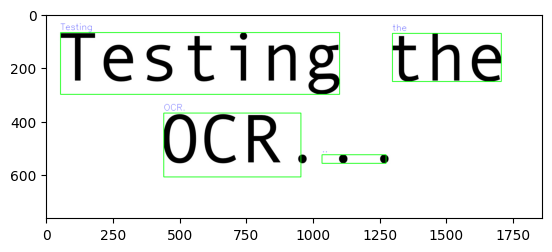

In [5]:
img_copy = img.copy()

min_confidence = 40

for i in range(0, len(result['text'])):
    # print(i)
    confidence = int(result['conf'][i])
    # print(confidence)
    if confidence > min_confidence:
        # print(confidence)
        x, y, img = bounding_box(result, img_copy, i)
        # print(x, y)
        text = result['text'][i]
        # print(text)
        cv2.putText(img_copy, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0, 0, 255))

plt.imshow(img_copy)

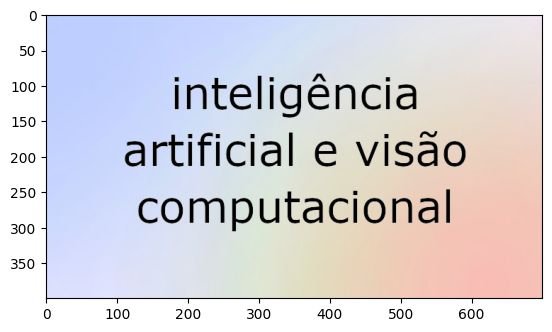

In [6]:
img = cv2.imread('./OCR_with_Python/Images/test02-02.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [7]:
config_tessract = '--tessdata-dir tessdata'
result = pytesseract.image_to_data(img, config=config_tessract, lang = 'por', output_type= Output.DICT)
result

{'level': [1, 2, 3, 4, 5, 4, 5, 5, 5, 4, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 2, 2, 2, 2, 3, 3],
 'word_num': [0, 0, 0, 0, 1, 0, 1, 2, 3, 0, 1],
 'left': [0, 111, 111, 182, 182, 111, 111, 380, 437, 130, 130],
 'top': [0, 84, 84, 84, 84, 165, 167, 179, 165, 247, 247],
 'width': [700, 481, 481, 341, 341, 481, 237, 30, 155, 440, 440],
 'height': [400, 222, 222, 62, 62, 50, 48, 36, 50, 59, 59],
 'conf': [-1, -1, -1, -1, 91, -1, 88, 93, 91, -1, 90],
 'text': ['',
  '',
  '',
  '',
  'inteligência',
  '',
  'artificial',
  'e',
  'visão',
  '',
  'computacional']}

In [8]:
from PIL import ImageFont, ImageDraw, Image
font = './OCR_with_Python/Fonts/calibri.ttf'

In [9]:
def write_text(text, x, y, img, font, font_size = 32):
    font = ImageFont.truetype(font, font_size)
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    draw.text((x, y - font_size), text, font = font)
    img = np.array(img_pil)
    return img

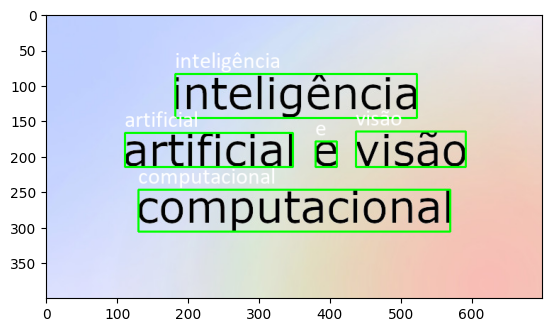

In [10]:

img_copy = img.copy()

min_confidence = 40

for i in range(0, len(result['text'])):
    # print(i)
    confidence = int(result['conf'][i])
    # print(confidence)
    if confidence > min_confidence:
        # print(confidence)
        x, y, img = bounding_box(result, img_copy, i)
        # print(x, y)
        text = result['text'][i]
        # print(text)
        # cv2.putText(img_copy, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0, 0, 255))
        img_copy = write_text(text, x, y, img_copy, font)

plt.imshow(img_copy)

In [11]:
import re

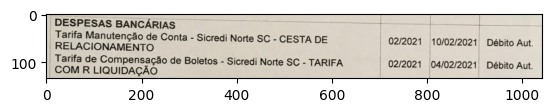

In [12]:
img = cv2.imread('./OCR_with_Python/Images/table_test.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [13]:
result = pytesseract.image_to_data(img, lang='por', config=config_tessract, output_type=Output.DICT)
result

{'level': [1,
  2,
  3,
  4,
  5,
  5,
  2,
  3,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  2,
  3,
  4,
  5,
  5,
  5],
 'page_num': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'block_num': [0,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  3,
  3,
  3,
  3],
 'par_num': [0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  

In [14]:
# https://regexr.com/
date_pattern = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'

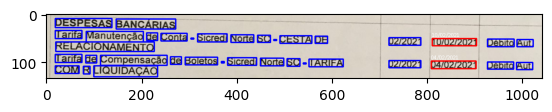

In [15]:

img_copy = img.copy()
min_confidence = 40
dates = []

for i in range(0, len(result['text'])):
    # print(i)
    confidence = int(result['conf'][i])
    # print(confidence)
    if confidence > min_confidence:
        text = result['text'][i]
        if re.match(date_pattern, text):
            # print(confidence)
            x, y, img = bounding_box(result, img_copy, i, color=(255,0,0))
            # print(x, y)
            # print(text)
            # cv2.putText(img_copy, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0, 0, 255))
            img_copy = write_text(text, x, y, img_copy, font, font_size=12)
            dates.append(text)
        else:
            x, y, img = bounding_box(result, img_copy, i, color=(0,0,255))


plt.imshow(img_copy)

In [16]:
dates

['10/02/2021', '04/02/2021']

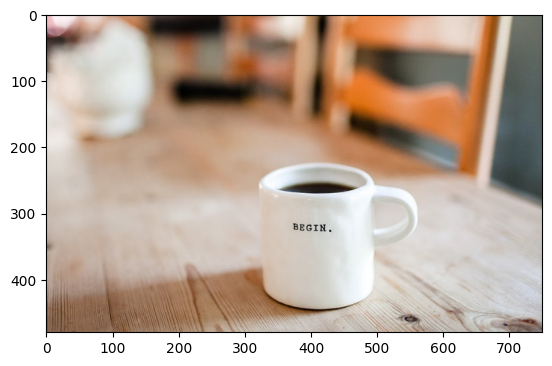

In [17]:
# Detecting texts in natural scenarios

img = cv2.imread('./OCR_with_Python/Images/cup.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [18]:
result = pytesseract.image_to_data(img, lang = 'eng', output_type=Output.DICT)
result

{'level': [1, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3],
 'par_num': [0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
 'word_num': [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
 'left': [0, 668, 668, 668, 668, 374, 374, 374, 374, 0, 0, 0, 0],
 'top': [0, 0, 0, 0, 0, 316, 316, 316, 316, 409, 409, 409, 409],
 'width': [750, 82, 82, 82, 82, 58, 58, 58, 58, 169, 169, 169, 169],
 'height': [480, 295, 295, 295, 295, 13, 13, 13, 13, 71, 71, 71, 71],
 'conf': [-1, -1, -1, -1, 95, -1, -1, -1, 74, -1, -1, -1, 95],
 'text': ['', '', '', '', ' ', '', '', '', 'BEGIN.', '', '', '', '']}

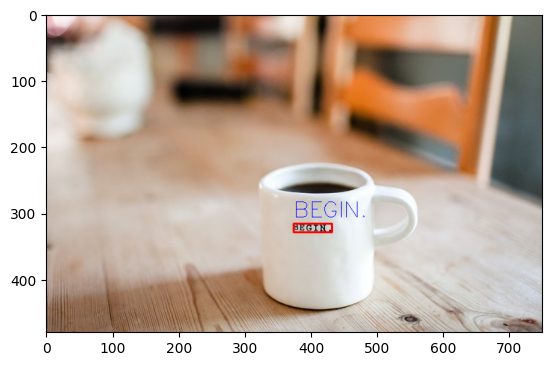

In [19]:
img_copy = img.copy()
min_confidence = 40

for i in range(0, len(result['text'])):
    # print(i)
    confidence = int(result['conf'][i])
    # print(confidence)
    if confidence > min_confidence:
        text = result['text'][i]
        if not text.isspace() and len(text) >0:
            x, y, img = bounding_box(result, img_copy, i, color=(255,0,0))
            cv2.putText(img_copy, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0, 0, 255))

plt.imshow(img_copy)

In [20]:
result['conf']

[-1, -1, -1, -1, 95, -1, -1, -1, 74, -1, -1, -1, 95]

In [21]:
result['text']

['', '', '', '', ' ', '', '', '', 'BEGIN.', '', '', '', '']